# The zoo of ion channels

The collection of `.mod` files comes from the Blue Brain Project's neocortical neuron models. It is presented here as a "toolkit" to build different types of neurons (e.g., a regular-spiking pyramidal cell vs. a fast-spiking interneuron).

Here is a breakdown of what each mechanism is and its primary role in shaping the neuron's electrical behavior.

---
### Sodium ($Na^+$) Currents (For Depolarization)

* **`NaTa_t.mod` (Fast Transient Sodium Current):**
    * **What it is:** This is your primary **action potential generator**. It's the classic Hodgkin-Huxley-style fast, inactivating sodium current ($I_{Na,t}$).
    * **Function:** Responsible for the rapid, explosive **upstroke** of the action potential. It activates quickly upon depolarization and then inactivates, which allows the spike to end.

* **`NaTs2_t.mod` (Shifted Fast Transient Sodium Current):**
    * **What it is:** A variant of the fast transient current (`NaTa_t`), but its activation and inactivation curves are **voltage-shifted**.
    * **Function:** This is often used to model differences in spike threshold or dynamics in different parts of the neuron (e.g., a different version for the dendrite vs. the soma).

* **`Nap_Et2.mod` (Persistent Sodium Current):**
    * **What it is:** A non-inactivating or very slowly-inactivating sodium current ($I_{Na,p}$). It activates at subthreshold voltages (more negative than the spike threshold) and doesn't turn off quickly.
    * **Function:** It **amplifies subthreshold synaptic inputs** and promotes **burst firing**. A little bit of this current can cause the neuron to fire a "burst" of multiple spikes instead of just one.

---
### Potassium ($K^+$) Currents (For Repolarization & Adaptation)

* **`K_Pst.mod` (Persistent Potassium Current):**
    * **What it is:** This is the classic **Delayed Rectifier** potassium current ($I_{K,dr}$). It's a "persistent" (non-inactivating) current that activates slowly (with a *delay*) upon depolarization.
    * **Function:** This is the primary current responsible for the **repolarization (downstroke)** of the action potential. It opens during the spike, K+ ions rush out, and the membrane potential is brought back down.

* **`K_Tst.mod` (Transient Potassium Current):**
    * **What it is:** This is a **transient (inactivating) A-type** potassium current ($I_A$). It activates quickly upon depolarization from a hyperpolarized state and then inactivates.
    * **Function:** It acts as a "brake" on firing. It **delays the onset of the first spike** and **increases the time between spikes** in a train, thus slowing down the firing frequency.

* **`Im.mod` (M-Type Potassium Current):**
    * **What it is:** A very slow, non-inactivating, low-voltage-activated potassium current ($I_M$). It's famous for being shut off by muscarinic acetylcholine receptors (hence "M-type").
    * **Function:** It causes **spike-frequency adaptation**. As the neuron fires, this current slowly builds up, making it progressively harder to fire the next spike, thus slowing the firing rate during a long stimulus.

---
### Calcium ($Ca^{2+}$) Currents (For Spikes, Bursts & Signaling)

* **`Ca.mod` (High-Voltage-Activated Calcium Current):**
    * **What it is:** A **High-Voltage-Activated (HVA)** calcium current (e.g., L-type, N-type). It requires a strong depolarization (like an action potential) to open.
    * **Function:** Causes calcium influx *during* an action potential, which can broaden the spike and (most importantly) trigger internal signaling cascades, such as activating calcium-dependent potassium channels.

* **`Ca_LVAst.mod` (Low-Voltage-Activated Calcium Current):**
    * **What it is:** A **Low-Voltage-Activated (LVA)** calcium current, also known as a T-type current ($I_T$).
    * **Function:** It is crucial for **rebound burst firing**. It is inactivated at rest and requires hyperpolarization to become available. When the hyperpolarization is released, it activates and creates a slow, low-threshold spike that can trigger a burst of fast Na+ action potentials on top.

---
### Other/Mixed Currents

* **`Ih.mod` (Hyperpolarization-Activated "Funny" Current):**
    * **What it is:** A non-specific cation current ($I_h$ or $I_f$) that, paradoxically, **activates upon hyperpolarization** (getting *more negative*).
    * **Function:** Acts as a "pacemaker" current. It opposes hyperpolarization, slowly depolarizing the cell back towards threshold. It's critical in setting the resting membrane potential and generating rhythmic activity.

---
### Utility Mechanism (Not a Channel!)

* **`CaDynamics_E2.mod` (Calcium Dynamics):**
    * **What it is:** This is **not an ion channel**. It's a "utility" or "helper" mechanism. It doesn't generate current.
    * **Function:** It **tracks the internal calcium concentration ($[Ca^{2+}]_i$)**. It *reads* the calcium current (`ica`) flowing in from all the *other* calcium channels (like `Ca` and `Ca_LVAst`) and uses that to calculate the change in `cai`. This `cai` variable can then be read by other channels (like calcium-activated potassium channels) to function properly.

In [1]:
#@title NEURON install (launch only once)
# Note: Google Colab gives you access to an "instance".
# This is a virtual machine ("container" would be more correct) that runs
# Linux with already a Python installation.
!pip install neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 128.0 MB/s eta 0:00:00


In [4]:
#@title Download .mod files of (some) active conductances (launch only once)
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Ca.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Ca_HVA.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Ca_LVAst.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/CaDynamics_E2.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Ih.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Im.mod"
#!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Isinunoisy.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/K_Pst.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/K_Tst.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/KdShu2007.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/Nap_Et2.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/NaTa_t.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/NaTs2_t.mod"
#!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/ProbAMPANMDA_EMS.mod"
#!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/ProbGABAAB_EMS.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/SK_E2.mod"
!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/SKv3_1.mod"
#!curl -O "https://raw.githubusercontent.com/mgiugliano/ModellingNeuralSystems/refs/heads/main/notebooks/bbp_cortex_mod_files/StochKv.mod"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1002  100  1002    0     0   4410      0 --:--:-- --:--:-- --:--:--  4414
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1022  100  1022    0     0  11683      0 --:--:-- --:--:-- --:--:-- 11747
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1106  100  1106    0     0  13370      0 --:--:-- --:--:-- --:--:-- 13487
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   681  100   681    0     0   6747      0 --:--:-- --:--:-- --:--:--  6810
  % Total    % Received % Xferd  Average Speed   Tim

In [6]:
#@title Compile the .mod file - launch only once and then restart the restart the Colab runtime. Go to Runtime -> Restart runtime
# Compile the .mod file. This creates a directory named x86_64.
!nrnivmodl

/content
cfiles =
Mod files: "CaDynamics_E2.mod" "Ca_HVA.mod" "Ca_LVAst.mod" "Ca.mod" "Ih.mod" "Im.mod" "KdShu2007.mod" "K_Pst.mod" "K_Tst.mod" "Nap_Et2.mod" "NaTa_t.mod" "NaTs2_t.mod" "SK_E2.mod" "SKv3_1.mod"

MODOBJS= ./CaDynamics_E2.o ./Ca_HVA.o ./Ca_LVAst.o ./Ca.o ./Ih.o ./Im.o ./KdShu2007.o ./K_Pst.o ./K_Tst.o ./Nap_Et2.o ./NaTa_t.o ./NaTs2_t.o ./SK_E2.o ./SKv3_1.o
 -> Compiling mod_func.cpp
 -> Compiling /content/x86_64/CaDynamics_E2.cpp
 -> Compiling /content/x86_64/Ca_HVA.cpp
 -> Compiling /content/x86_64/Ca_LVAst.cpp
 -> Compiling /content/x86_64/Ca.cpp
 -> Compiling /content/x86_64/Ih.cpp
 -> Compiling /content/x86_64/Im.cpp
 -> Compiling /content/x86_64/KdShu2007.cpp
 -> Compiling /content/x86_64/K_Pst.cpp
 -> NMODL ../K_Tst.mod
Translating K_Tst.mod into /content/x86_64/K_Tst.cpp
Thread Safe
 -> NMODL ../Nap_Et2.mod
Translating Nap_Et2.mod into /content/x86_64/Nap_Et2.cpp
Thread Safe
 -> NMODL ../NaTa_t.mod
Translating NaTa_t.mod into /content/x86_64/NaTa_t.cpp
Thread Safe


In [3]:
#@title NEURON and other Python Libraries import
from neuron import n
import matplotlib.pyplot as plt

# run standard library for high-level simulation control functions
n.load_file("stdrun.hoc")

# Only in a jupyter notebook / jupyter lab environment
%matplotlib inline

In [259]:
#@title Define and create the model
n.celsius = 30

# create model
soma  = n.Section(name="soma")
soma.cm = 1      # capacitance (uF/cm^2)
soma.L  = 20     # length µm
soma.diam = 20   # diameter µm

apc = n.APCount(0.5, sec=soma)  #

soma.insert('pas')      # add passive properties
soma.g_pas = 1/10000    # set the specific membrane

# Insert ALL the mechanisms provided
soma.insert('pas')         # Passive leak (built-in)
soma.insert('NaTa_t')      # Transient Na+
soma.insert('NaTs2_t')     # Shifted transient Na+
soma.insert('Nap_Et2')     # Persistent Na+
soma.insert('K_Tst')       # Transient K+
soma.insert('K_Pst')       # Persistent K+
soma.insert('Im')          # M-type K+
soma.insert('Ca')          # HVA Ca2+
soma.insert('Ca_LVAst')    # LVA Ca2+
soma.insert('Ih')          # HCN current
soma.insert('CaDynamics_E2') # Calcium dynamics (vital for Ca2+ channels)

# Set reversal potentials (good practice)
soma.ena = 50
soma.ek = -85
soma.eca = 120
soma.e_pas = -70
soma.ehcn = -45 # Reversal for Ih is set in its own .mod file

# current clamp
stim = n.IClamp(soma(0.5))
stim.delay = 10         # start of the current injection (ms)
stim.dur  = 2           # duration (ms)
stim.amp  = 0.035        # amplitude (nA)

stim2 = n.IClamp(soma(0.5))
stim2.delay = 100         # start of the current injection (ms)
stim2.dur  = 175           # duration (ms)
stim2.amp  = 0.01        # amplitude (nA)


# record voltage at the soma, the injected current, and the time
soma_v = n.Vector()
soma_v.record(soma(0.5)._ref_v)

stim_current = n.Vector()
stim_current.record(stim._ref_i)
stim_current1 = n.Vector()
stim_current1.record(stim2._ref_i)

time = n.Vector()
time.record(n._ref_t)

Nspikes = n.h.Vector()
Nspikes.record(apc._ref_n)

n.t = 0
n.tstop = 3000 # set the simulation time
n.dt = 0.025
n.v_init = -70

n.run()


# plotting
f, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[4, 1]})
ax0.plot(time,soma_v, 'k')
ax1.plot(time,stim_current+stim_current1, 'gray', label='I (nA)')
ax0.set_ylabel('Memrabe Potential (mV)')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current Injected (nA)')
ax0.set_ylim([-90, 50])

AttributeError: 'nrn.Section' object has no attribute 'ehcn'

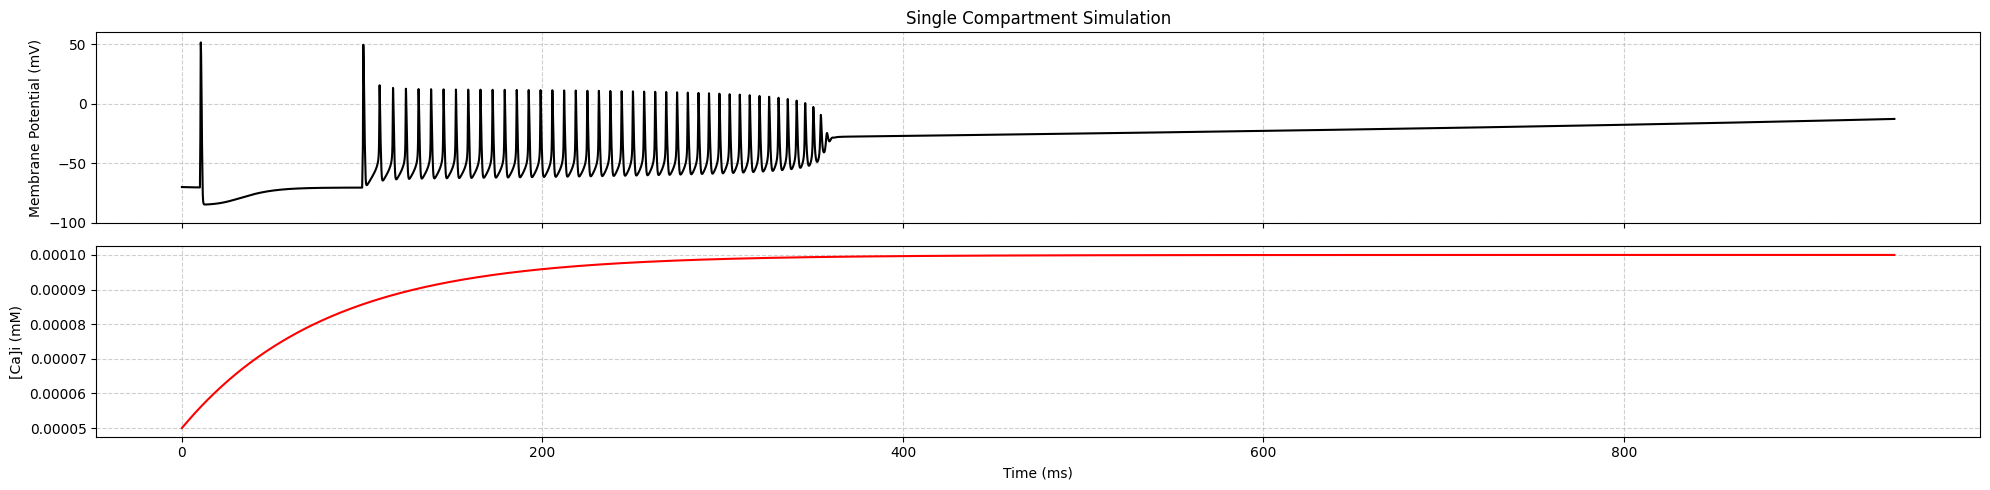

In [281]:
#@title Run the numerical simulation { run: "auto", vertical-output: true}

import numpy as np

n.celsius = 30

# create model
soma  = n.Section(name="soma")
soma.cm = 1      # capacitance (uF/cm^2)
soma.L  = 20     # length µm
soma.diam = 20   # diameter µm

apc = n.APCount(0.5, sec=soma)  #

# --- 1. Simulation Parameters (Set by Colab Forms) ---
#markdown ### Stimulus Parameters
stim_amp = 1. #@param {type:"number"}
#{type:"slider", min:-0.1, max:1.0, step:0.01}

#markdown ### Channel Conductances (S/cm^2)
#markdown Using 'number' type allows you to enter scientific notation (e.g., 1e-5)
g_pas = 1e-04 ##param {type:"number"}

# @markdown Fast Transient Sodium Current
gNaTa_t = 0.15 #@param {type:"number"}

# @markdown Fast Transient Sodium Current (voltage-shifted)
gNaTs2_t = 0 #@param {type:"number"}

# @markdown Persistent Sodium Current
gNap_Et2 = 0 #@param {type:"number"}

# @markdown Transient Potassium Current (A-type)
gK_Tst = 0. #@param {type:"number"}

# @markdown Persistent Potassium Current (delayed rectifier)
gK_Pst = 0.1 #@param {type:"number"}

# @markdown M-Type Potassium Current
gIm = 0.0 #@param {type:"number"}

# @markdown High-Voltage-Activated (HVA) calcium current (e.g., L-type, N-type).
gCa = 0.0000 #@param {type:"number"}

# @markdown Low-Voltage-Activated (LVA) calcium current, also known as a T-type.
gCa_LVAst = 0. #@param {type:"number"}

# @markdown Hyperpolarization-Activated "Funny" Current
gIh = 0. #@param {type:"number"}


# --- 2. Build the Cell Model ---
n.celsius = 30
soma = n.Section(name='soma')
soma.L = 20
soma.diam = 20
soma.cm = 1

# Insert all mechanisms
soma.insert('pas')
soma.insert('NaTa_t')
soma.insert('NaTs2_t')
soma.insert('Nap_Et2')
soma.insert('K_Tst')
soma.insert('K_Pst')
soma.insert('Im')
soma.insert('Ca')
soma.insert('Ca_LVAst')
soma.insert('Ih')
soma.insert('CaDynamics_E2')

# Set reversal potentials
soma.ena = 50
soma.ek = -85
soma.eca = 120
soma.e_pas = -70
# soma.ehcn = -45 # This is set in the .mod file for Ih

# --- 3. Set Parameters from Sliders ---
# Set conductances
soma.g_pas = g_pas
soma.gNaTa_tbar_NaTa_t = gNaTa_t
soma.gNaTs2_tbar_NaTs2_t = gNaTs2_t
soma.gNap_Et2bar_Nap_Et2 = gNap_Et2
soma.gK_Tstbar_K_Tst = gK_Tst
soma.gK_Pstbar_K_Pst = gK_Pst
soma.gImbar_Im = gIm
soma.gCabar_Ca = gCa
soma.gCa_LVAstbar_Ca_LVAst = gCa_LVAst
soma.gIhbar_Ih = gIh




n.tstop = 1000 #300
n.dt = 0.025


# Add current clamp
stim = n.IClamp(soma(0.5))
stim.amp = stim_amp*2
stim.dur = 1
stim.delay = 10
stim2 = n.IClamp(soma(0.5))
stim2.amp = stim_amp
stim2.dur = n.tstop = n.tstop - 50
stim2.delay = 100

# --- 4. Setup Recording ---
t_vec = n.Vector().record(n._ref_t)
v_vec = n.Vector().record(soma(0.5)._ref_v)
cai_vec = n.Vector().record(soma(0.5)._ref_cai)

# --- 5. Run and Plot ---
n.v_init = -70
n.run()

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5), sharex=True)
#plt.figure(figsize=(20, 3))
ax1.plot(t_vec, v_vec, color='black')
ax1.set_title("Single Compartment Simulation")
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_ylim(-100, 60)
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.plot(t_vec, cai_vec, color='red')
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("[Ca]i (mM)") # Units are mM from the .mod file

# # Set y-lim for calcium to be just above its baseline
# # (The baseline is 1e-4 mM as defined in CaDynamics_E2.mod)
# min_cai = np.min(cai_vec)
# max_cai = np.max(cai_vec)
# padding = (max_cai - min_cai) * 0.1
# if padding == 0:
#     padding = min_cai * 0.1 if min_cai > 0 else 0.0001
# ax2.set_ylim(min_cai * 0.9, max_cai + padding)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Prevents labels from overlapping
plt.show()